In [23]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from collections import Counter
import nltk
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
nltk.download('stopwords')

class Problem():
    def __init__(self, data):
        self.problem = data['problem']
        try: self.level = re.search(r'\d', data['level'])[0]
        except: self.level = None
        self.type =  data['type']
        self.solution = data['solution']
        self.problem_numbers = self.count_numbers(self.problem)
        self.solution_numbers = self.count_numbers(self.solution)

    def count_numbers(self,s):
        return len(re.findall(r'\d+', s))
    
    def __str__(self):
        return str({"problem": self.problem, "level": self.level, "type": self.type, "solution": self.solution})
    
    def __repr__(self):
        return self.__str__()




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kennethmitchell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:

# path_to_train = "train"
path_to_train = "../MATH/train/"

problems = []

for root, dirs, files in os.walk(path_to_train):
    for file in files:
        file_path = os.path.join(root, file)
        if file_path.endswith(".json"):
            with open(file_path, "r") as f:
                problems.append(Problem(json.load(f)))

In [25]:
path_to_test = "../MATH/test/"

test_problems = []

for root, dirs, files in os.walk(path_to_test):
    for file in files:
        file_path = os.path.join(root, file)
        if file_path.endswith(".json"):
            with open(file_path, "r") as f:
                test_problems.append(Problem(json.load(f)))

In [26]:
test_categories = [prob.type for prob in test_problems]
test_difficulty = [prob.level for prob in test_problems]
test_problem_text = [' '.join(prob.problem.lower().replace(".", "").replace("?", "").replace(",", "").split()) for prob in test_problems]
# test_difficulty

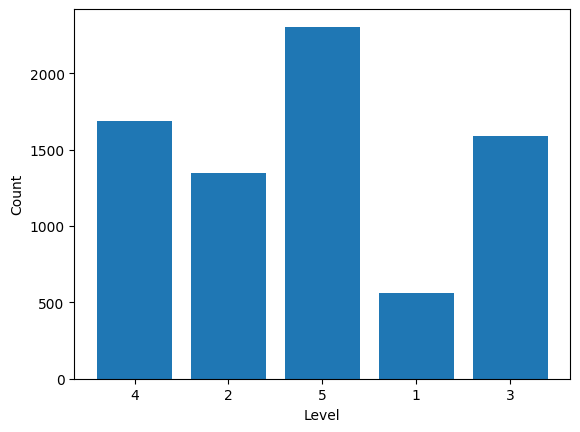

In [27]:
levels = [problem.level for problem in problems]
levels = [level for level in levels if level is not None]

level_counts = {level: levels.count(level) for level in set(levels)}

plt.bar(level_counts.keys(), level_counts.values())

plt.xlabel('Level')
plt.ylabel('Count')

plt.show()


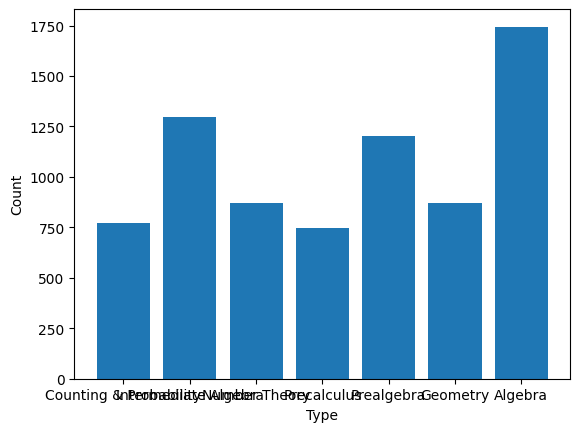

In [28]:
types = [problem.type for problem in problems]

type_counts = {type: types.count(type) for type in types}

plt.bar(type_counts.keys(), type_counts.values())

plt.xlabel('Type')
plt.ylabel('Count')

plt.show()


(array([4192., 2018.,  478.,  173.,  118.,   83.,   72.,   66.,   48.,
          31.,   40.,   27.,   26.,   11.,   14.,   19.,    8.,    8.,
          12.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
        65., 70., 75., 80., 85., 90., 95.]),
 <BarContainer object of 19 artists>)

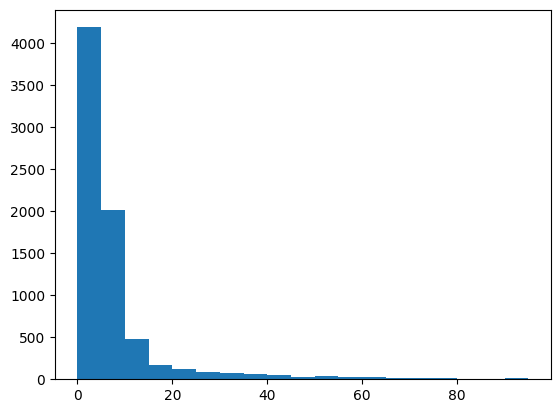

In [29]:
numbers = [problem.problem_numbers for problem in problems]

plt.hist(numbers, bins=range(0, 100, 5))

(array([ 218., 1000., 1160., 1025.,  833.,  614.,  447.,  360.,  291.,
         276.,  187.,  175.,  131.,  107.,   87.,   74.,   77.,   60.,
          67.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
        65., 70., 75., 80., 85., 90., 95.]),
 <BarContainer object of 19 artists>)

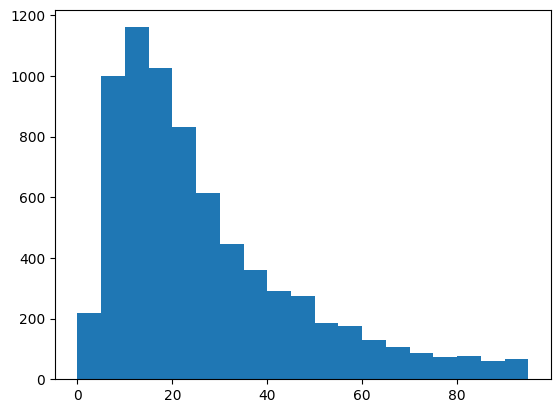

In [30]:
numbers = [problem.solution_numbers for problem in problems]

plt.hist(numbers, bins=range(0, 100, 5))

In [31]:
test = problems[0]
print(test.problem)
print(test.problem_numbers)


A board game spinner is divided into three parts labeled $A$, $B$  and $C$. The probability of the spinner landing on $A$ is $\frac{1}{3}$ and the probability of the spinner landing on $B$ is $\frac{5}{12}$.  What is the probability of the spinner landing on $C$? Express your answer as a common fraction.
4


[]

<Figure size 2000x600 with 0 Axes>

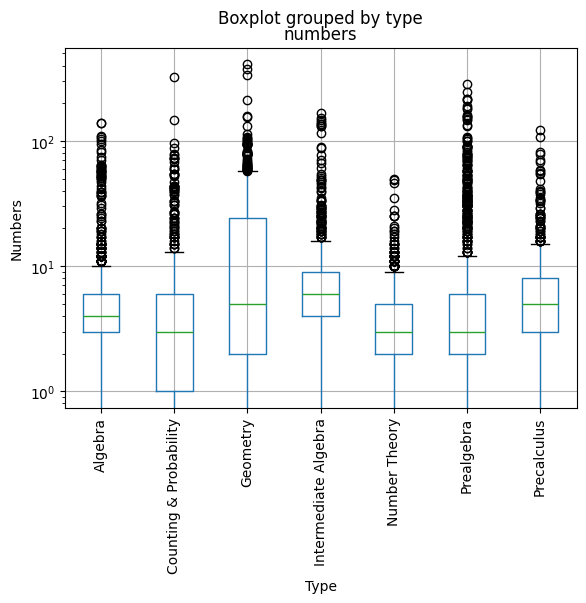

In [32]:
types = [problem.type for problem in problems]
numbers = [problem.problem_numbers for problem in problems]
df = pd.DataFrame({'type': types, 'numbers': numbers})

plt.figure(figsize=(20, 6))

boxplot = df.boxplot(by='type')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.ylabel('Numbers')
plt.yscale('log')
plt.plot()

<Axes: title={'center': 'numbers'}, xlabel='[level]'>

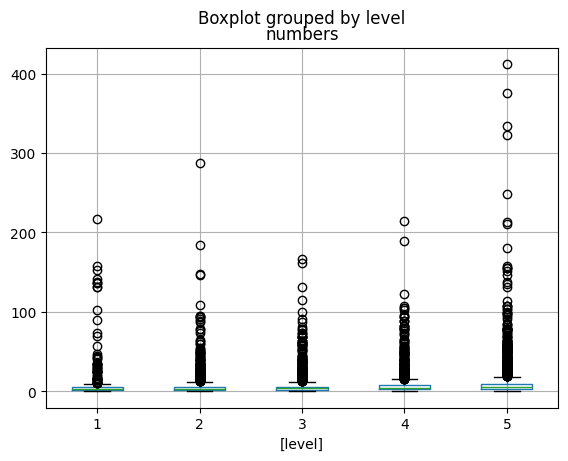

In [33]:
levels = [problem.level for problem in problems]
numbers = [problem.problem_numbers for problem in problems]
df = pd.DataFrame({'level': levels, 'numbers': numbers})

df.boxplot(by='level')

In [34]:
problems_categorized = {
    "algebra": [],
    "counting & probability": [],
    "geometry": [],
    "intermediate algebra": [],
    "number theory": [],
    "prealgebra": [],
    "precalculus": []}

for problem in problems:
    problems_categorized[problem.type.lower()].append(problem)

In [35]:
word_counters_problem = {
    "algebra": Counter(),
    "counting & probability": Counter(),
    "geometry": Counter(),
    "intermediate algebra": Counter(),
    "number theory": Counter(),
    "prealgebra": Counter(),
    "precalculus": Counter()}

for category in problems_categorized:
    for problem in problems_categorized[category]:
        word_counters_problem[category].update(problem.problem.lower().split())

#### Without stopwords removed

In [36]:
for category in problems_categorized:
    print(f"Most common 5 words for {category} are {word_counters_problem['algebra'].most_common(5)}")

Most common 5 words for algebra are [('the', 3254), ('of', 2025), ('is', 1535), ('and', 953), ('what', 892)]
Most common 5 words for counting & probability are [('the', 3254), ('of', 2025), ('is', 1535), ('and', 953), ('what', 892)]
Most common 5 words for geometry are [('the', 3254), ('of', 2025), ('is', 1535), ('and', 953), ('what', 892)]
Most common 5 words for intermediate algebra are [('the', 3254), ('of', 2025), ('is', 1535), ('and', 953), ('what', 892)]
Most common 5 words for number theory are [('the', 3254), ('of', 2025), ('is', 1535), ('and', 953), ('what', 892)]
Most common 5 words for prealgebra are [('the', 3254), ('of', 2025), ('is', 1535), ('and', 953), ('what', 892)]
Most common 5 words for precalculus are [('the', 3254), ('of', 2025), ('is', 1535), ('and', 953), ('what', 892)]


#### With stopwords removed

In [37]:
for category in problems_categorized:
    updated_counter = word_counters_problem[category]
    for word in list(updated_counter):
        if word in set(stopwords.words('english')):
            del updated_counter[word]

    print(f"Most common 5 words for {category} are {updated_counter.most_common(5)}")

Most common 5 words for algebra are [('+', 686), ('=', 652), ('value', 432), ('real', 353), ('find', 310)]
Most common 5 words for counting & probability are [('probability', 330), ('many', 294), ('two', 282), ('one', 218), ('number', 218)]
Most common 5 words for geometry are [('=', 1056), ('area', 335), ('triangle', 332), ('[/asy]', 309), ('[asy]', 307)]
Most common 5 words for intermediate algebra are [('+', 2341), ('=', 1327), ('-', 1026), ('find', 675), ('real', 459)]
Most common 5 words for number theory are [('positive', 338), ('integer', 255), ('number', 236), ('$n$', 187), ('many', 182)]
Most common 5 words for prealgebra are [('many', 349), ('=', 265), ('number', 209), ('[/asy]', 171), ('square', 168)]
Most common 5 words for precalculus are [('=', 1008), ('+', 784), ('\\\\', 596), ('find', 434), ('&', 384)]


In [38]:
categories = [problem.type for problem in problems]
problem_text = [' '.join(problem.problem.lower().replace(".", "").replace("?", "").replace(",", "").split()) for problem in problems]

In [39]:
cv = CountVectorizer(min_df=10, max_df=0.4) # words must show up in at least 10 and no more than 40% of documents
features = cv.fit_transform(problem_text)
print(features.shape)
vocab = cv.get_feature_names_out()
print(vocab)

(7500, 1487)
['00' '000' '001' ... 'zero' 'zeroes' 'zeros']


In [40]:
mnb = MultinomialNB()

feat_train, feat_test, label_train, label_test = train_test_split(features, categories, test_size=0.2)

mnb.fit(feat_train, label_train)
preds = mnb.predict(feat_test)

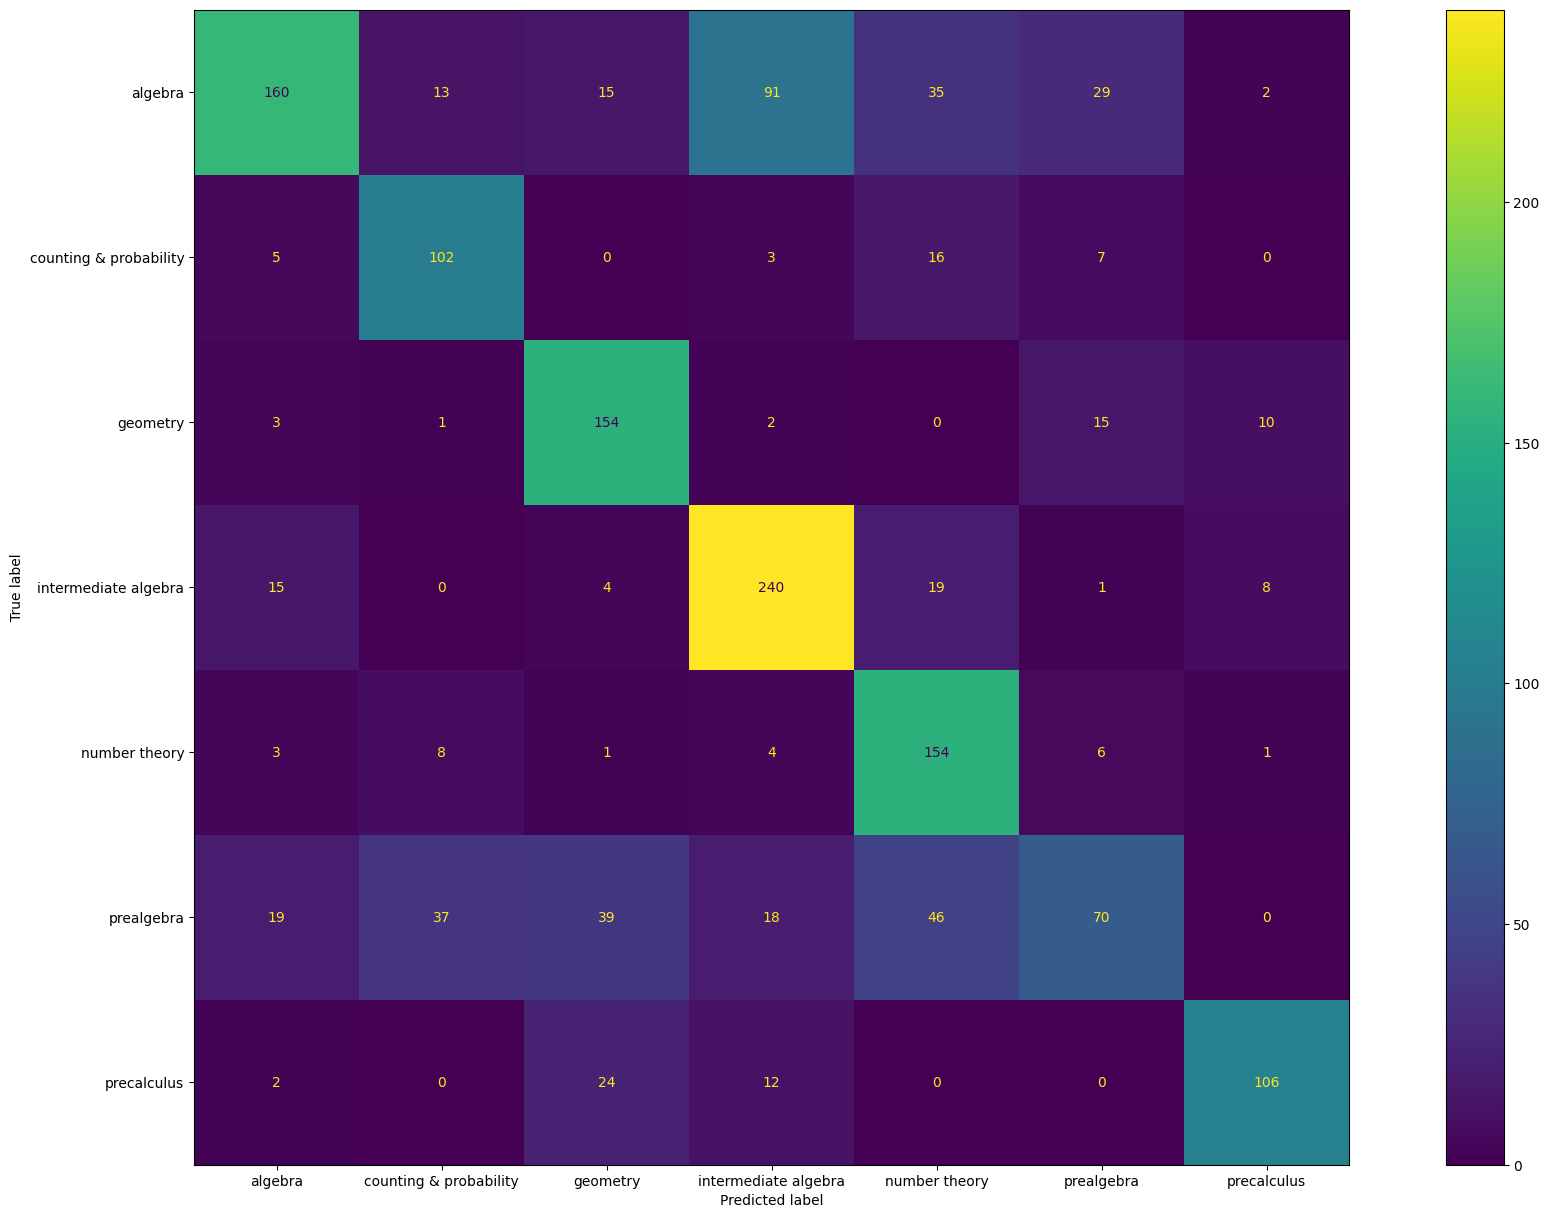

In [41]:
confusion_matrix = metrics.confusion_matrix(label_test, preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [category for category in problems_categorized])

fig, ax = plt.subplots(figsize=(25,15))

cm_display.plot(ax=ax)
plt.show()

In [42]:
print(confusion_matrix)

[[160  13  15  91  35  29   2]
 [  5 102   0   3  16   7   0]
 [  3   1 154   2   0  15  10]
 [ 15   0   4 240  19   1   8]
 [  3   8   1   4 154   6   1]
 [ 19  37  39  18  46  70   0]
 [  2   0  24  12   0   0 106]]


In [43]:
# https://stackoverflow.com/questions/40729875/calculate-precision-and-recall-in-a-confusion-matrix
from operator import truediv
import numpy as np

tp = np.diag(confusion_matrix)
prec = list(map(truediv, tp, np.sum(confusion_matrix, axis=0)))
rec = list(map(truediv, tp, np.sum(confusion_matrix, axis=1)))

for category, pNum, rNum in zip(problems_categorized, prec, rec):
    print(f"The {category} category has a precision of {pNum} and a recall of {rNum}")
# print ('Precision: {}\nRecall: {}'.format(prec, rec))

The algebra category has a precision of 0.7729468599033816 and a recall of 0.463768115942029
The counting & probability category has a precision of 0.6335403726708074 and a recall of 0.7669172932330827
The geometry category has a precision of 0.6497890295358649 and a recall of 0.8324324324324325
The intermediate algebra category has a precision of 0.6486486486486487 and a recall of 0.8362369337979094
The number theory category has a precision of 0.5703703703703704 and a recall of 0.8700564971751412
The prealgebra category has a precision of 0.546875 and a recall of 0.3056768558951965
The precalculus category has a precision of 0.8346456692913385 and a recall of 0.7361111111111112


(7500, 1487)


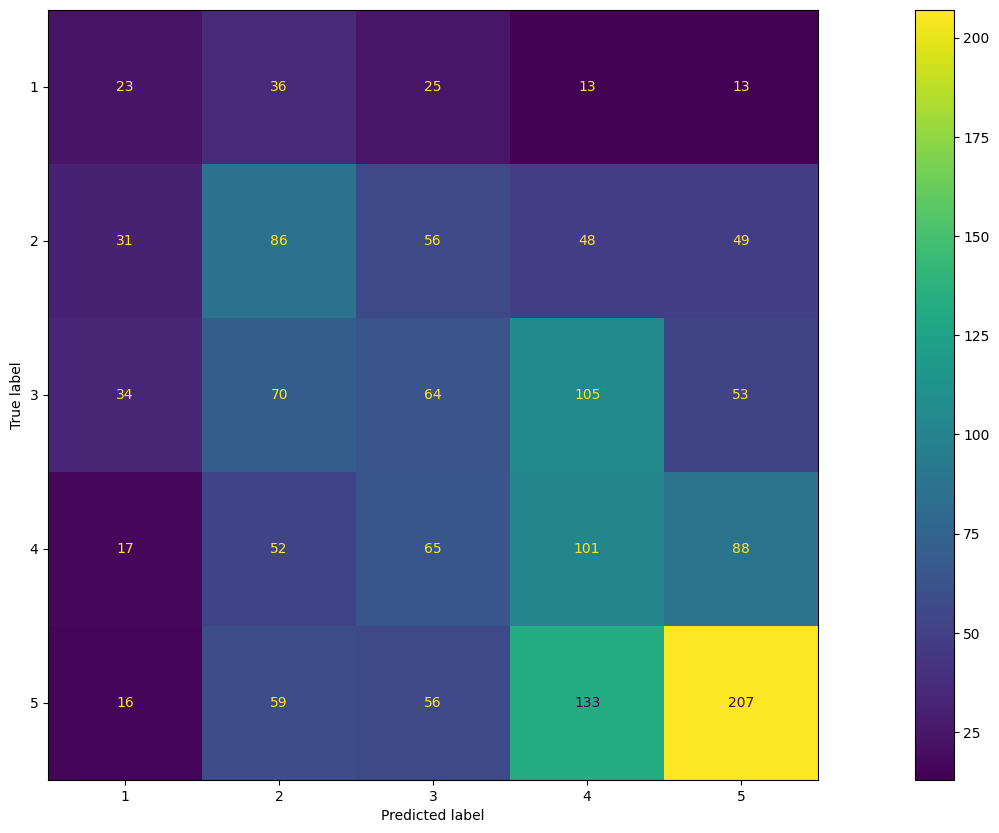

In [44]:
categories = [str(problem.level) for problem in problems]
problem_text = [' '.join(problem.problem.lower().replace(".", "").replace("?", "").replace(",", "").split()) for problem in problems]

cv = CountVectorizer(min_df=10, max_df=0.4) # words must show up in at least 10 and no more than 40% of documents
features = cv.fit_transform(problem_text)
print(features.shape)
vocab = cv.get_feature_names_out()
# print(vocab)

mnb = MultinomialNB()

feat_train, feat_test, label_train, label_test = train_test_split(features, categories, test_size=0.2)

mnb.fit(feat_train, label_train)
preds = mnb.predict(feat_test)

confusion_matrix = metrics.confusion_matrix(label_test, preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [str(level) for level in range(1,6)])

fig, ax = plt.subplots(figsize=(25,10))
plt.xticks(fontsize = 10,rotation = 90)
plt.yticks(fontsize = 10)

cm_display.plot(ax=ax)
plt.show()


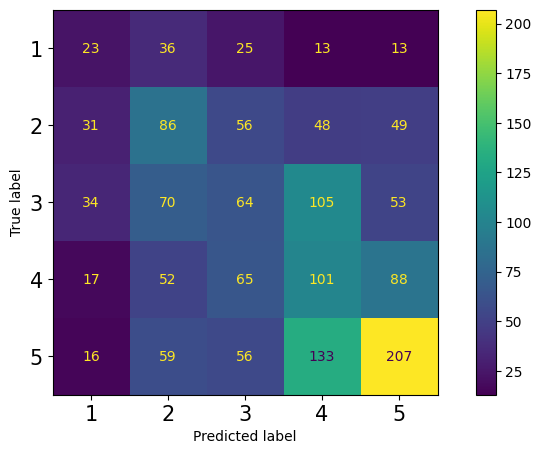

In [45]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [str(level) for level in range(1,6)])

fig, ax = plt.subplots(figsize=(10, 5))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

cm_display.plot(ax=ax)
plt.show()

In [46]:
from operator import truediv
import numpy as np

tp = np.diag(confusion_matrix)
prec = list(map(truediv, tp, np.sum(confusion_matrix, axis=0)))
rec = list(map(truediv, tp, np.sum(confusion_matrix, axis=1)))

for level, pNum, rNum in zip(range(1,6), prec, rec):
    print(f"The F1 score for level {level} is {(2*pNum*rNum)/(pNum+rNum)}")
    # print(f"The {level} level has a precision of {pNum} and a recall of {rNum} and the F sco")

The F1 score for level 1 is 0.19913419913419914
The F1 score for level 2 is 0.30017452006980805
The F1 score for level 3 is 0.21621621621621623
The F1 score for level 4 is 0.2793914246196404
The F1 score for level 5 is 0.46992054483541434


In [47]:
problems_level = {
    1: [],
    2: [],
    3: [],
    4: [],
    5: []}

for problem in problems:
    if problem.level is not None:
        # print(int(problem.level))
        problems_level[int(problem.level)].append(problem)

word_counters_problem_level = {
    1: Counter(),
    2: Counter(),
    3: Counter(),
    4: Counter(),
    5: Counter()}

for level in range(1,6):
    for problem in problems_level[level]:
        word_counters_problem_level[level].update(problem.problem.lower().split())

In [48]:
for level in range(1,6):
    updated_counter = word_counters_problem_level[level]
    for word in list(updated_counter):
        if word in set(stopwords.words('english')):
            del updated_counter[word]

    print(f"Most common 5 words for level {level} are {updated_counter.most_common(5)}")

Most common 5 words for level 1 are [('=', 256), ('+', 162), ('-', 129), ('value', 97), ('find', 81)]
Most common 5 words for level 2 are [('=', 561), ('+', 417), ('find', 256), ('many', 245), ('value', 203)]
Most common 5 words for level 3 are [('+', 886), ('=', 874), ('find', 403), ('-', 371), ('&', 280)]
Most common 5 words for level 4 are [('+', 1192), ('=', 1038), ('find', 457), ('-', 390), ('&', 267)]
Most common 5 words for level 5 are [('+', 1741), ('=', 1740), ('find', 782), ('let', 612), ('-', 602)]


In [49]:
categories = [problem.type for problem in problems]
problem_text = [' '.join(problem.problem.lower().replace(".", "").replace("?", "").replace(",", "").split()) for problem in problems]

cv = CountVectorizer(min_df=10, max_df=0.4) # words must show up in at least 10 and no more than 40% of documents
features = cv.fit_transform(problem_text)
print(features.shape)
vocab = cv.get_feature_names_out()
print(vocab)

mnb = MultinomialNB()

feat_train, feat_test, label_train, label_test = train_test_split(features, categories, test_size=0.00001)

mnb.fit(feat_train, label_train)
# preds = mnb.predict(feat_test)

(7500, 1487)
['00' '000' '001' ... 'zero' 'zeroes' 'zeros']


MultinomialNB()

In [50]:
cv = CountVectorizer(min_df=10, max_df=0.4) # words must show up in at least 10 and no more than 40% of documents
test = cv.fit_transform(test_problem_text)
print(features.shape)
vocab = cv.get_feature_names_out()
print(vocab)

preds = mnb.predict(test)

(7500, 1487)
['00' '000' '001' ... 'z_2' 'zero' 'zeros']


ValueError: X has 1003 features, but MultinomialNB is expecting 1487 features as input.

In [ ]:
len(list(feat_test))

1